In [1]:
import networkx as nx
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [3]:
plt.rcParams["figure.figsize"] = (20,3)

In [74]:
from shared.constants import DatasetPath
from datasets.schema import DatasetSchema
from datasets.loading import load_igraph, igraph_to_nx

from datasets.visualization import plot_explore_dual_histogram, show_top_k_nodes, show_top_k_stacked_nodes

In [5]:
DATASET = DatasetPath('social-distancing-student')
schema = DatasetSchema.load_schema(DATASET.name)
G = load_igraph(schema)

In [89]:
TIMESTAMP_BINS = 50
K = 10

# Dataset Specific Statistics

## Visualize Distribution of Nodes over Time

In [97]:
TIMESTAMPS = pd.Series(G.vs['timestamp'], name='timestamp', index=G.vs['name'])
LABELS = pd.Series(G.vs['label'], name='label', index=G.vs['name'])

Text(0, 0.5, 'Number of Nodes')

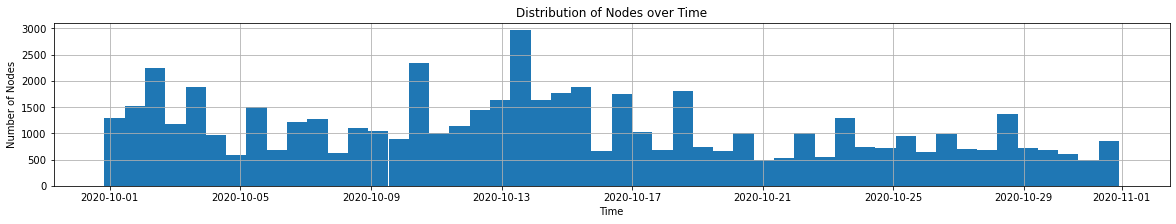

In [95]:
TIMESTAMPS.dropna().hist(
    bins=TIMESTAMP_BINS,
)
plt.title('Distribution of Nodes over Time')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')

# Global Statistics

In [8]:
print(f'Number of Nodes: {G.vcount()}')
print(f'Number of Edges: {G.ecount()}')
print(f'Density: {G.density()}')

Number of Nodes: 93433
Number of Edges: 3710183
Density: 0.0008500204765102186


In [9]:
degrees = pd.Series(G.degree(), index=G.vs['name'])

In [10]:
print(f'Average Degree: {np.mean(degrees)}')
print(f'Median Degree: {np.median(degrees)}')

Average Degree: 79.41911316130275
Median Degree: 4.0


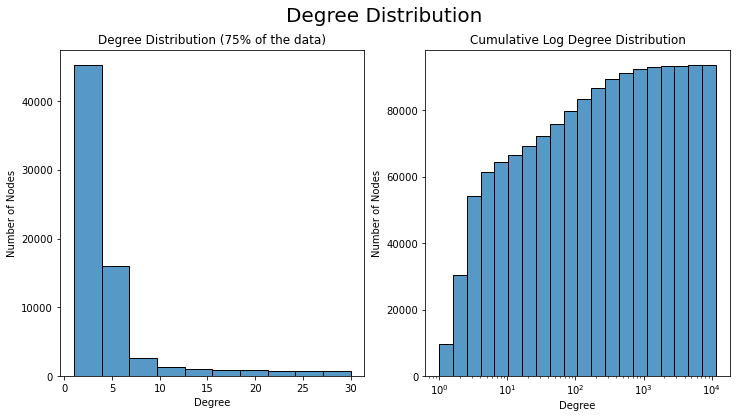

In [11]:
plot_explore_dual_histogram(
    series=degrees,
    title='Degree Distribution',
    title_short='Degree Distribution',
    xlabel='Degree',
    ylabel='Number of Nodes',
    normalize=False,
)
plt.show()

In [12]:
# labels = dict(zip(G.vs['name'], G.vs['label']))
show_top_k_nodes(
    degrees,
    LABELS,
    title='Degree Nodes'
)

Top 10 Degree Nodes


,value,label
0,11505,NOS
1,11073,Mark Rutte
2,7711,RIVM
3,7670,Matthijs Pontier 💜🏴‍☠️
4,7456,NU.nl
5,7108,de Volkskrant
6,7056,RTL Nieuws
7,6988,Thierry Baudet
8,6845,Wierd Duk
9,6563,Maurice de Hond


## Connectivity Metrics
* **degree_centrality**: Degree centrality of a node is the fraction of nodes it is connected to.
* **closeness_centrality**: Closeness centrality of a node is the inverse of the average shortest path length to all other nodes.
* **betweenness_centrality**: Betweenness centrality of a node is the fraction of all shortest paths in the network that pass through it.
* **eigenvector_centrality**: Eigenvector centrality of a node is the normalized sum of the eigenvector centralities of all its neighbors.
* **pagerank**: PageRank is a ranking of nodes based on the structure of the network.
* **transitivity**: Clustering coefficient is the fraction of triangles that are formed by a node and its neighbors.

In [13]:
# Use the largest connected component
G_cc = G.clusters().giant()

# Convert to NetworkX
nx_G = igraph_to_nx(G_cc)
nx_Gu = nx.Graph(nx_G)

In [14]:
print('Average Clustering Coefficient: {}'.format(nx.approximation.average_clustering(nx_Gu)))
print('Diameter: {}'.format(nx.approximation.diameter(nx_Gu)))

Average Clustering Coefficient: 0.298
Diameter: 15


In [15]:
# Calculate the metrics
degree_centrality = nx.degree_centrality(nx_G)
betweenness_centrality = nx.betweenness_centrality(nx_Gu, k=5)
eigenvector_centrality = nx.eigenvector_centrality(nx_Gu)
page_rank = nx.pagerank(nx_Gu)
transitivity = dict(zip(G_cc.vs['name'], G_cc.transitivity_local_undirected()))

In [16]:
NODE_STATS = pd.DataFrame({
    'degree_centrality': degree_centrality,
    'betweenness_centrality': betweenness_centrality,
    'eigenvector_centrality': eigenvector_centrality,
    'page_rank': page_rank,
    'transitivity': transitivity
})
NODE_STATS.describe()

,degree_centrality,betweenness_centrality,eigenvector_centrality,page_rank,transitivity
count,92828.000000,9.282800e+04,9.282800e+04,92828.000000,82458.000000
mean,0.000861,2.567991e-05,9.327505e-04,0.000011,0.338164
std,0.003063,1.224333e-03,3.146855e-03,0.000031,0.352957
min,0.000011,0.000000e+00,2.292513e-21,0.000002,0.000000
25%,0.000022,0.000000e+00,4.537200e-06,0.000002,0.000000
50%,0.000043,9.033968e-09,3.081323e-05,0.000004,0.234477
75%,0.000345,6.240145e-06,3.225603e-04,0.000008,0.499552
max,0.123940,2.072633e-01,6.207933e-02,0.002366,1.000000


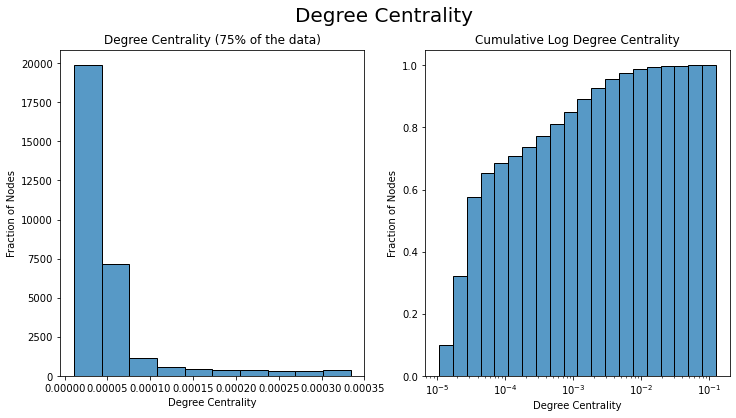

/dd_volume/Development/Python/Thesis/code/env/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Failed to plot Betweenness Centrality


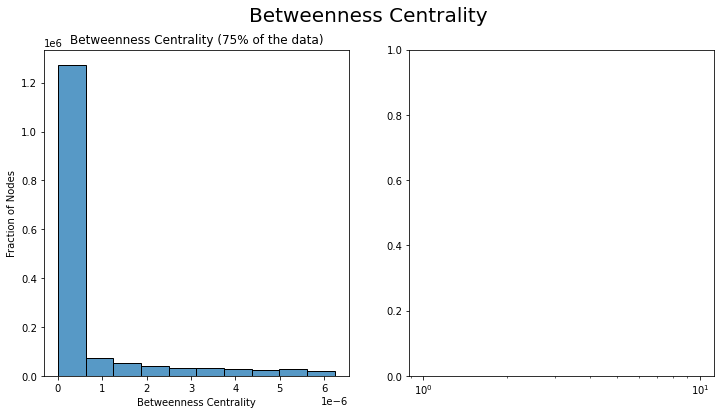

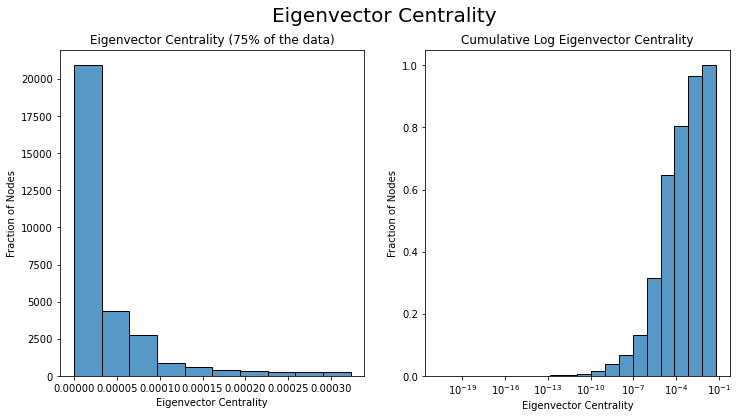

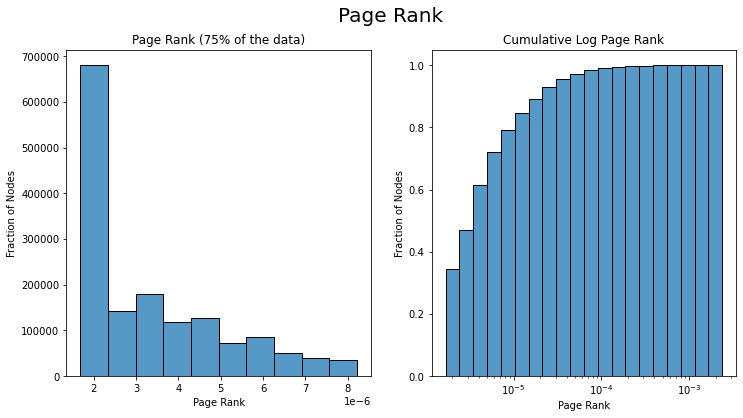

/dd_volume/Development/Python/Thesis/code/env/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Failed to plot Transitivity


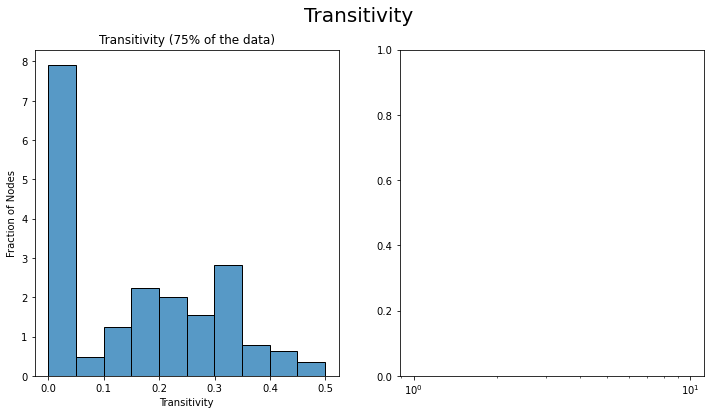

In [17]:
for col in NODE_STATS.columns:
    title = col.replace('_', ' ').title()
    data = NODE_STATS[col][np.isfinite(NODE_STATS[col])]
    try:
        plot_explore_dual_histogram(
            series=data,
            title=title,
            title_short=title,
            xlabel=title,
            ylabel='Fraction of Nodes',
            normalize=True,
        )
        plt.show()
    except:
        print(f'Failed to plot {title}')

In [75]:
# labels = dict(zip(G_cc.vs['name'], G_cc.vs['label']))

show_top_k_stacked_nodes(
    NODE_STATS,
    LABELS,
    title='Nodes by Statistic',
)

Top 10 Top Nodes by Statistic


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.123940,NOS,0.207263,Mark Rutte,0.062079,Thierry Baudet,0.002366,Mark Rutte,1.0,RT @UitInTiel: Vandaag of in het weekend boods...
1,0.119286,Mark Rutte,0.200083,Thijs,0.056700,Wierd Duk,0.002314,NOS,1.0,"RT @Cryptopixels: Blijf thuis, mondkapje op, g..."
2,0.083069,RIVM,0.172262,Andrea,0.053949,NOS,0.001378,Maurice de Hond,1.0,"Europa zucht, steunt en mort tijdens tweede co..."
3,0.082627,Matthijs Pontier 💜🏴‍☠️,0.127927,Annelies,0.053103,Ebru Umar #1,0.001359,RIVM,1.0,@oogstgroningen De Herestraat is veel te smal ...
4,0.080321,NU.nl,0.074110,Le Blanc,0.050931,Maurice de Hond,0.001283,Marc Van Ranst,1.0,"@moeva18 Echt niet, hou maar gewoon afstand, j..."
5,0.076573,de Volkskrant,0.030841,NOS,0.050725,Sietske Bergsma,0.001254,NU.nl,1.0,RT @Nieuwsuur: Op zeker 342 van de 648 Nederla...
6,0.076012,RTL Nieuws,0.028679,Kaatje,0.050608,Matthijs Pontier 💜🏴‍☠️,0.001205,Hugo de Jonge,1.0,RT @rob_televisie: Luid zingen en schermutseli...
7,0.075280,Thierry Baudet,0.020626,Marc Van Ranst,0.050463,Mark Rutte,0.001155,RTL Nieuws,1.0,RT @AsbaiBadr: Strengere maatregelen= staat vo...
8,0.073739,Wierd Duk,0.018850,RIVM,0.050386,Martin Bos,0.001142,De Telegraaf,1.0,@marcelbar8 Situatie in Duitsland is onvergeli...
9,0.070701,Maurice de Hond,0.011912,Tim Hofman,0.048908,Jan Dijkgraaf,0.001060,Tim Hofman,1.0,@GuillaumeVdS Had iedereen zich aan de regels ...


## Connected Components Statistics

In [19]:
print(f'Number of Connected Components: {len(G.components())}')
largest_cc = G.components().giant()
print(f'Size of the largest component: {largest_cc.vcount()}')

Number of Connected Components: 245
Size of the largest component: 92828


Text(0.5, 1.0, 'Connected Components')

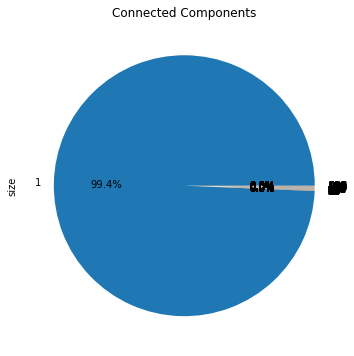

In [20]:
df_tmp = pd.DataFrame([{'size': len(c)} for i,c in enumerate(G.components())], index=range(1,len(G.components())+1))
ax = df_tmp.plot.pie(
    y='size',
    figsize=(6,6),
    autopct='%1.1f%%',
    legend=False,
)
ax.set_title('Connected Components')

# Type Specific Statistics

### Node Type Statistics

In [21]:
node_types = schema.get_node_types()
node_type_stats = pd.DataFrame([
    {
        'type': node_type,
        'count': len(G.vs.select(type=node_type)),
        'degree_avg': np.mean(G.vs.select(type=node_type).degree()),
        'degree_median': np.median(G.vs.select(type=node_type).degree()),
    }
    for node_type in node_types
], index=node_types)
print('Node Type count: {}'.format(len(node_types)))
node_type_stats

Node Type count: 3


,type,count,degree_avg,degree_median
User,User,34919,207.401501,69.0
Hashtag,Hashtag,2341,5.259718,1.0
Tweet,Tweet,56173,2.951596,3.0


<AxesSubplot:title={'center':'Node type counts'}, ylabel='count'>

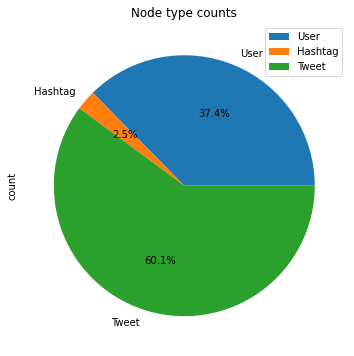

In [22]:
node_type_stats.plot.pie(y='count', autopct='%1.1f%%', title='Node type counts', figsize=(6,6))

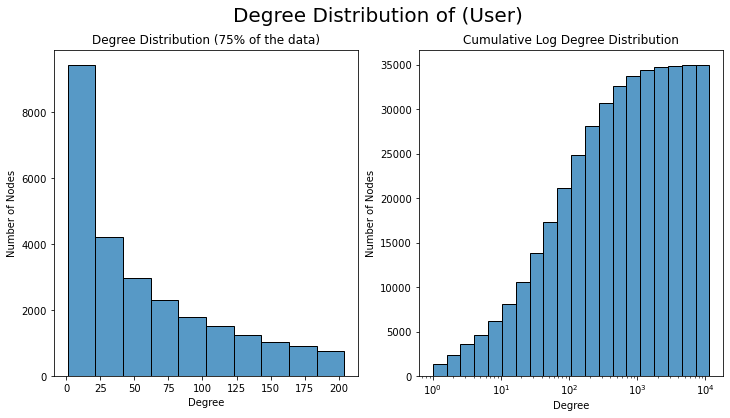

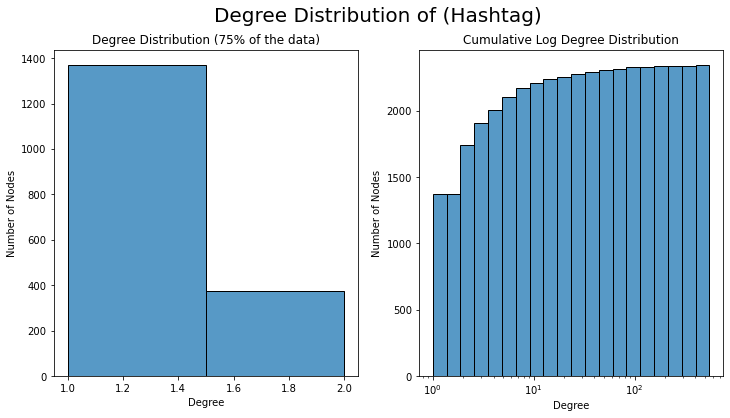

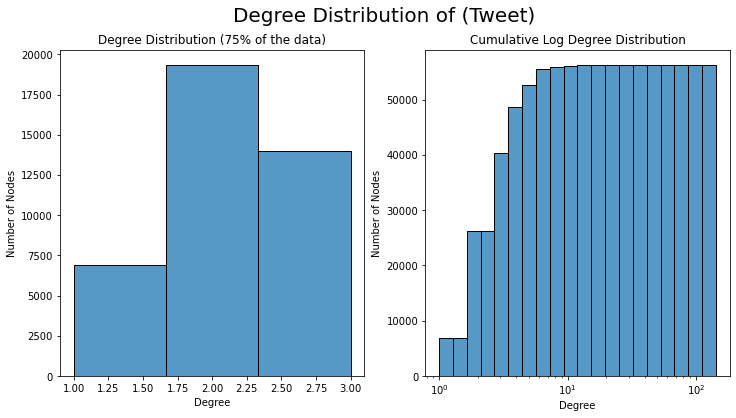

In [23]:
for node_type in node_types:
    degrees = pd.Series(G.vs.select(type=node_type).degree())
    plot_explore_dual_histogram(
        series=degrees,
        title=f'Degree Distribution of ({node_type})',
        title_short='Degree Distribution',
        xlabel='Degree',
        ylabel='Number of Nodes',
    )
    plt.show()

In [24]:
for node_type in node_types:
    nodes = G.vs.select(type=node_type)
    data = pd.Series(nodes.degree(), index=nodes['name'])
    # labels = dict(zip(nodes['name'], nodes['label']))
    show_top_k_nodes(
        data,
        LABELS,
        title=f'Degree Nodes of Type ({node_type})'
    )

Top 10 Degree Nodes of Type (User)


,value,label
0,11505,NOS
1,11073,Mark Rutte
2,7711,RIVM
3,7670,Matthijs Pontier 💜🏴‍☠️
4,7456,NU.nl
5,7108,de Volkskrant
6,7056,RTL Nieuws
7,6988,Thierry Baudet
8,6845,Wierd Duk
9,6563,Maurice de Hond


Top 10 Degree Nodes of Type (Hashtag)


,value,label
0,552,anderhalvemeter
1,413,coronamaatregelen
2,389,mondkapjes
3,340,mondkapje
4,279,coroNEE
5,223,coronavirus
6,208,Covid19
7,193,anderhalvemeterdictatuur
8,178,corona
9,150,Corona


Top 10 Degree Nodes of Type (Tweet)


,value,label
0,143,"@vanbinnenblauw @lisette1100 Hoi, het is belan..."
1,59,"Volgens collega Wilders is de 1,5 meter-regel ..."
2,34,"HOUD 1,5 METER AFSTAND. WAS JE HANDEN STUK. LA..."
3,29,#JAGERS #KRIMPENERWAARD OVERTREDEN #CORONA REG...
4,28,Houden ons aan de regels zoals deze vandaag ge...
5,22,"""de coronamaatregelen zijn strikt nageleefd. [..."
6,21,Draag een mondkapje in publiek toegankelijke b...
7,21,RedTeam luidt alarmbellen: ’Leerlingen voortge...
8,16,"Mijn oom heeft corona en is besmettelijk, maar..."
9,16,"@peter_persyn @De7deDag Beste, bedankt voor de..."


### Edge Type Statistics

In [25]:
edge_types = schema.get_edge_types()
edge_type_stats = pd.DataFrame([
    {
        'type': edge_type,
        'count': len(G.es.select(type=edge_type)),
    }
    for edge_type in edge_types
], index=edge_types)
print('Edge Type count: {}'.format(len(edge_types)))
edge_type_stats

Edge Type count: 7


,type,count
TWEETED,TWEETED,56173
REPLIES_TO_USER,REPLIES_TO_USER,21769
REPLIES_TO_TWEET,REPLIES_TO_TWEET,2148
QUOTES_TWEET,QUOTES_TWEET,441
MENTIONS_USER,MENTIONS_USER,70367
MENTIONS_HASHTAG,MENTIONS_HASHTAG,12313
FOLLOWS,FOLLOWS,3546972


<AxesSubplot:title={'center':'Edge type counts'}, ylabel='count'>

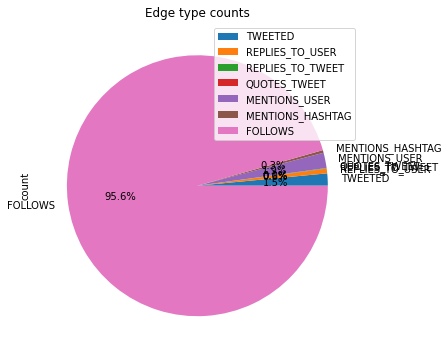

In [26]:
edge_type_stats.plot.pie(y='count', autopct='%1.1f%%', title='Edge type counts', figsize=(6,6))

## Node Type Connectivity Statistics

In [36]:
node_stats_by_type = {}

for node_type in node_types:
    nodes = G.vs.select(type=node_type)
    names = set(nodes['name']) & set(NODE_STATS.index)

    node_stats_by_type[node_type] = NODE_STATS.loc[names]

In [76]:
for node_type in node_types:
    show_top_k_stacked_nodes(
        node_stats_by_type[node_type],
        LABELS,
        title=f'Nodes by Statistic for {node_type}',
    )

Top 10 Top Nodes by Statistic for User


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.123940,NOS,0.207263,Mark Rutte,0.062079,Thierry Baudet,0.002366,Mark Rutte,1.0,Von NL 🇳🇱🇪🇺
1,0.119286,Mark Rutte,0.200083,Thijs,0.056700,Wierd Duk,0.002314,NOS,1.0,caroline
2,0.083069,RIVM,0.172262,Andrea,0.053949,NOS,0.001378,Maurice de Hond,1.0,Boswachter-Marion
3,0.082627,Matthijs Pontier 💜🏴‍☠️,0.127927,Annelies,0.053103,Ebru Umar #1,0.001359,RIVM,1.0,𝘮𝘢𝘢𝘺𝘬𝘦 🦋
4,0.080321,NU.nl,0.074110,Le Blanc,0.050931,Maurice de Hond,0.001283,Marc Van Ranst,1.0,Stoter
5,0.076573,de Volkskrant,0.030841,NOS,0.050725,Sietske Bergsma,0.001254,NU.nl,1.0,Cor
6,0.076012,RTL Nieuws,0.028679,Kaatje,0.050608,Matthijs Pontier 💜🏴‍☠️,0.001205,Hugo de Jonge,1.0,S. A.
7,0.075280,Thierry Baudet,0.020626,Marc Van Ranst,0.050463,Mark Rutte,0.001155,RTL Nieuws,1.0,BADMINTON INDIA 365
8,0.073739,Wierd Duk,0.018850,RIVM,0.050386,Martin Bos,0.001142,De Telegraaf,1.0,marianne bierema
9,0.070701,Maurice de Hond,0.011912,Tim Hofman,0.048908,Jan Dijkgraaf,0.001060,Tim Hofman,1.0,Die mit dem Koala tanzt💃(🦠📱)


Top 10 Top Nodes by Statistic for Hashtag


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.005947,anderhalvemeter,0.000722,anderhalvemeter,0.000021,anderhalvemeter,0.000534,anderhalvemeter,1.000000,Ikhebeenmondkapje
1,0.004449,coronamaatregelen,0.000635,coronamaatregelen,0.000017,mondkapjes,0.000389,coronamaatregelen,0.333333,hoekvanholland
2,0.004191,mondkapjes,0.000232,coroNEE,0.000015,Covid19,0.000328,mondkapjes,0.166667,deanderhalvemetershow
3,0.003663,mondkapje,0.000221,corona,0.000015,coronavirus,0.000324,mondkapje,0.100000,leerlingen
4,0.003006,coroNEE,0.000156,mondkapjes,0.000013,coronamaatregelen,0.000207,coroNEE,0.047619,CoronaApp
5,0.002402,coronavirus,0.000156,mondkapje,0.000011,stemmingmakerij,0.000198,corona,0.022222,Covid1984
6,0.002241,Covid19,0.000145,blijfthuis,0.000006,BOA,0.000193,coronavirus,0.001587,VermijdDrukte
7,0.002079,anderhalvemeterdictatuur,0.000123,mondkapjesplicht,0.000006,mondkapje,0.000159,Corona,0.001587,HetkanallemaalinTwente
8,0.001918,corona,0.000110,coronaregels,0.000006,Sneek,0.000157,Covid19,0.001347,freethepeople
9,0.001616,Corona,0.000108,persconferentie,0.000006,Alcoholverbod,0.000150,blijfthuis,0.001282,HoudAfstand


Top 10 Top Nodes by Statistic for Tweet


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.001541,"@vanbinnenblauw @lisette1100 Hoi, het is belan...",0.000284,@DuindamRj @Bart4817 @patricksavalle @albert_p...,0.000479,RT @Peetlief: @FlavioPasquino @hugodejonge @ri...,0.000098,"@vanbinnenblauw @lisette1100 Hoi, het is belan...",1.0,Namens @politieacademie dag over jeugdgroepen ...
1,0.000636,"Volgens collega Wilders is de 1,5 meter-regel ...",0.000274,@Ruud_Brouwer @IngridJijbakker @DuindamRj @pat...,0.000476,@FlavioPasquino @hugodejonge @rivm @MinPres @m...,0.000050,"Volgens collega Wilders is de 1,5 meter-regel ...",1.0,RT @KarelDoorman3: Hypocriet statement van FVD...
2,0.000366,"HOUD 1,5 METER AFSTAND. WAS JE HANDEN STUK. LA...",0.000274,@IngridJijbakker @KiesvoorNEXIT @albert_pronk ...,0.000431,@hugodejonge @MinPres @thierrybaudet @geertwil...,0.000031,"HOUD 1,5 METER AFSTAND. WAS JE HANDEN STUK. LA...",1.0,RT @shossontwits: De grenzen van de zorg komen...
3,0.000312,#JAGERS #KRIMPENERWAARD OVERTREDEN #CORONA REG...,0.000274,@IngridJijbakker @DuindamRj @Ruud_Brouwer @pat...,0.000398,@BestNr7 @NPO1 @NOS @MinPres @rivm @ZEMBLA @vo...,0.000024,#JAGERS #KRIMPENERWAARD OVERTREDEN #CORONA REG...,1.0,RT @SterrenwachtGV: 15 oktober (20:00 - 22:00 ...
4,0.000302,Houden ons aan de regels zoals deze vandaag ge...,0.000187,"@rood_wit Nou @RobJetten en @SigridKaag, jull...",0.000396,@fritsander @FlavioPasquino @GemkeConny @rivm ...,0.000023,Houden ons aan de regels zoals deze vandaag ge...,1.0,RT @SBergsma: Veelo loopt alvast warm voor zij...
5,0.000237,"""de coronamaatregelen zijn strikt nageleefd. [...",0.000172,@Walrathis @ginnymooy Een beetje flauw is deze...,0.000396,@harry59degroot @FlavioPasquino @GemkeConny @r...,0.000021,#Schilderworkshop Joke #Krul za. 21 &amp; 28 n...,1.0,"@Kath_74 En het zijn 75plussers, dus ik denk d..."
6,0.000226,Draag een mondkapje in publiek toegankelijke b...,0.000145,@Fokkelman @VolgerGoede @MarcoHeemskerk7 @DonR...,0.000395,@harry59degroot @FlavioPasquino @GemkeConny @r...,0.000021,#coronamaatregelen #blijfthuis #amsterdam #rot...,1.0,RT @Gaia_Universe: 'Als mensen zich aan twee b...
7,0.000226,RedTeam luidt alarmbellen: ’Leerlingen voortge...,0.000130,RT @WakkerGeluid: Net meerdere winkels geweest...,0.000395,@fritsander @FlavioPasquino @GemkeConny @rivm ...,0.000021,RT @rayklaassen: ANDERHALVE METER SESSIES\n\nB...,1.0,RT @xxxVeraGeexxx: Een draadje: waar zijn uw f...
8,0.000172,"@peter_persyn @De7deDag Beste, bedankt voor de...",0.000129,RT @ProjobJobs: Met spoed op zoek naar toezich...,0.000321,RT @BobVeritas: @hommel_b @mariannezw 🤣 Colleg...,0.000021,1.5 met vn elkaar...vandaag met Steam @j.marte...,1.0,RT @demo_demo_nl: Idiotie.\nLeg meer tijdelijk...
9,0.000172,"Mijn oom heeft corona en is besmettelijk, maar...",0.000129,@mzelst @edwinveldhuizen #sluitscholen alle !\...,0.000318,@Peetlief @DeRedacteur_ @MinPres @hugodejonge ...,0.000020,#BlijfGezond #BlijfBewegen #HoudtAfstand #Weer...,1.0,@MarjaRaams Lakse woning coöperatie!Mogge Marj...


# Clustering

## No Clustering Modularity

In [42]:
n = G_cc.vcount()
print(f'Initial modularity: {G_cc.modularity(np.ones(n))}')

Initial modularity: 0.0


### Louvain

In [52]:
louvain = G_cc.community_multilevel()
print(f'Modularity after Louvain: {G_cc.modularity(louvain)}')
print(f'Number of communities: {len(louvain)}')

Modularity after Louvain: 0.44389770298960307
Number of communities: 479


<AxesSubplot:title={'center':'Node over community distribution'}, ylabel='None'>

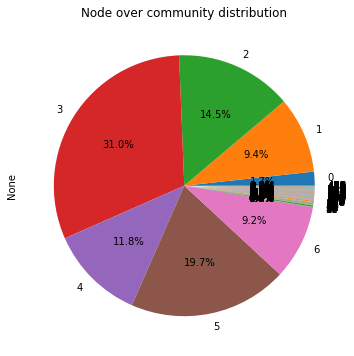

In [63]:
community_sizes = pd.Series(list(map(len, louvain)), index=range(len(louvain)))
community_sizes.plot.pie(y='count', autopct='%1.1f%%', title='Node over community distribution', figsize=(6,6))

Top 10 Nodes by Statistic for Community 0


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.004406,Looopings,0.000553,Maxim De Donder,0.002943,Sanne van Galen,0.000257,Victor Hopman,1.0,@caorin__ Ja he?! Ik ben er ook super blij mee...
1,0.003200,Sanne van Galen,0.000332,Victor Hopman,0.001542,Marc,0.000103,Looopings,1.0,"@fn_santi Ja klopt, ik ga me ook zeker ziek me..."
2,0.002790,Kleine Boodschap,0.000322,ᴮᴱNikita⁷ maskertje op,0.001429,Looopings,0.000070,M⁷☆,1.0,@looopings Vanmiddag werden er bij trapped nog...
3,0.002402,Maxim De Donder,0.000287,Marc,0.001111,Max,0.000066,Team Looopings,1.0,Nora/kaz00mi
4,0.002176,LeroyMijns 🥳,0.000241,Looopings,0.001071,Karim,0.000061,ThemeTalk,1.0,RT @RTLnieuws: Gisteren konden de coronamaatre...
5,0.002176,David Harms 🌈,0.000236,Walibi Holland,0.001071,Mikki,0.000060,David Harms 🌈,1.0,RT @WalibiHolland: Wat kun je verwachten als j...
6,0.002079,ThemeTalk,0.000174,♡𝑺𝒖𝒅𝒆 𝒁𝒂𝒏𝒂🐺⁷/ BLM ACAB FREE🇵🇸,0.001041,Daan kouwie ® ©,0.000055,Joost Bouhof 🎭 ʲᵒᵒˢᵗˣʳᵒᵉᵈᶦᵉ•ⁿˡ,1.0,@looopings Wij zijn er gisteren geweest en wer...
7,0.002079,Victor Hopman,0.000172,Charlotte⁷,0.000938,Jaap van Wijk,0.000054,ᴮᴱNikita⁷ maskertje op,1.0,@looopings Wij zijn er gisteren geweest en wer...
8,0.001939,Chelsey,0.000168,Nadine,0.000827,Chelsey,0.000051,Love you,1.0,RT @Dutchexo_L: @FonAeris Ja idd. Ik had laats...
9,0.001756,Arendo,0.000166,Sanne van Galen,0.000795,Maxim De Donder,0.000049,🎃✨EftelSteffel✨🎃,1.0,RT @SimonTAdventure: Nergens in Nederland loop...


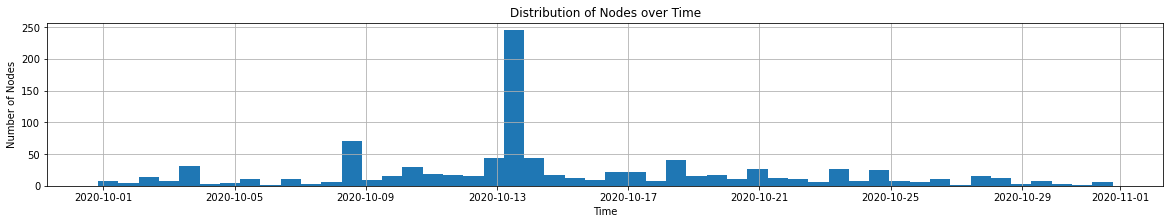

Top 10 Nodes by Statistic for Community 1


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.057052,#Ingeborgvraagt🍀😇,0.006335,Vester71,0.037715,Vester71,0.000438,Rianne Meijer,1.0,"@jezzebel74 Oh, ja. Dat is een periode waar ie..."
1,0.051429,Karel Tiberius N⭕ ⭕itgedacht,0.004959,twopcharts_nl,0.036580,Celal Altuntas,0.000416,Karel Tiberius N⭕ ⭕itgedacht,1.0,@Donderwolkje JA!. Ik ben totaal niet bang aan...
2,0.043996,Vester71,0.004870,Don Roelofsen,0.034302,Karel Tiberius N⭕ ⭕itgedacht,0.000384,#Ingeborgvraagt🍀😇,1.0,@baliekluiver Het is idd. onmogelijk om je alt...
3,0.041497,Celal Altuntas,0.003430,Karel Tiberius N⭕ ⭕itgedacht,0.034162,#Ingeborgvraagt🍀😇,0.000376,twopcharts_nl,1.0,@Topdob11 Ik ben het helemaal met je eens \nLa...
4,0.041130,twopcharts_nl,0.002928,Rianne Meijer,0.033567,Erwin Witteveen,0.000368,Don Roelofsen,1.0,@Qattekop @janwillemmulder Dat begrijp ik als ...
5,0.040742,Tolerance2021 🇳🇱 🌈 ⚽,0.002480,Merel Morre,0.031539,Peggy BvD,0.000359,Merel Morre,1.0,@CorrieBult @Qattekop Strenger betekent allema...
6,0.040452,Jan-Luuk,0.002311,Boswachter Tim,0.028210,📸Miss Filter💄🤳🏼,0.000354,Boswachter Tim,1.0,"@stefanpostulart Bij ons zitten jaargang 2,3,4..."
7,0.039924,Korreltje zout!,0.002298,Jan-Luuk,0.027776,Richard,0.000343,Remco,1.0,RT @19Grafiek: Bij amateursporten gaat het om ...
8,0.039428,Rianne Meijer,0.002211,📸Miss Filter💄🤳🏼,0.026736,twopcharts_nl,0.000329,Erwin Witteveen,1.0,@tommypijkeren Maar je kunt in de sportschool ...
9,0.038006,Peggy BvD,0.002171,Remco,0.025492,Chanarchist 💫,0.000326,Koningin Máxima🔸,1.0,@realmpie Toch vreemd dat ik naast wildvreemde...


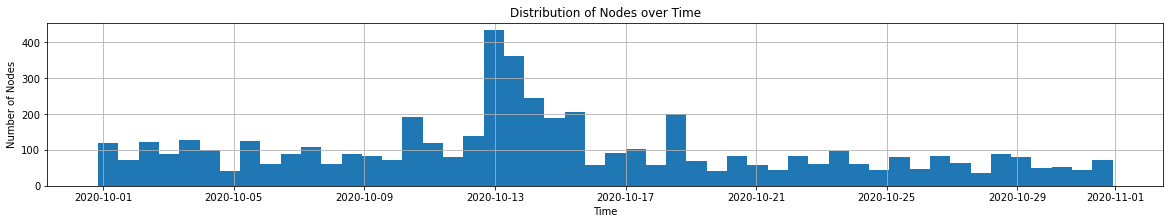

Top 10 Nodes by Statistic for Community 2


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.075280,Thierry Baudet,0.127927,Annelies,0.062079,Thierry Baudet,0.001040,Thierry Baudet,1.0,@LeoniqueUnique Ik word wel boos van dat veel ...
1,0.073739,Wierd Duk,0.074110,Le Blanc,0.056700,Wierd Duk,0.000991,Wybren van Haga,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
2,0.056341,Eelco van Hoecke,0.010090,Paradisebird🌴⚓️ 42 Marines The Pacific 1961-1962,0.053103,Ebru Umar #1,0.000768,Wierd Duk,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
3,0.055663,ZilteHond ☀️,0.006248,Wybren van Haga,0.050725,Sietske Bergsma,0.000598,Fleur Agema,1.0,RT @AsbaiBadr: Strengere maatregelen= staat vo...
4,0.053271,Jan Dijkgraaf,0.005101,Arthur van Amerongen,0.050386,Martin Bos,0.000595,Criticaster1960,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
5,0.051504,Martin Bos,0.004583,Criticaster1960,0.048908,Jan Dijkgraaf,0.000546,Annelies,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
6,0.051117,blck bx,0.004117,SmokeScream,0.048689,ZilteHond ☀️,0.000530,Marianne Zwagerman,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
7,0.051030,Ebru Umar #1,0.003622,Wierd Duk,0.048643,Fleur Agema,0.000529,Jan Dijkgraaf,1.0,RT @fmeeus1: Alarmerende zeespiegel stijging d...
8,0.050298,Lou Lewinsky 2,0.003609,Thierry Baudet,0.048504,John Zuyderduyn,0.000515,Ebru Umar #1,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...
9,0.049975,Wybren van Haga,0.003550,Mercy,0.048324,FvD lid 🚜,0.000488,Sietske Bergsma,1.0,RT @FleurAgemaPVV: Vriendin belde. Ze heeft co...


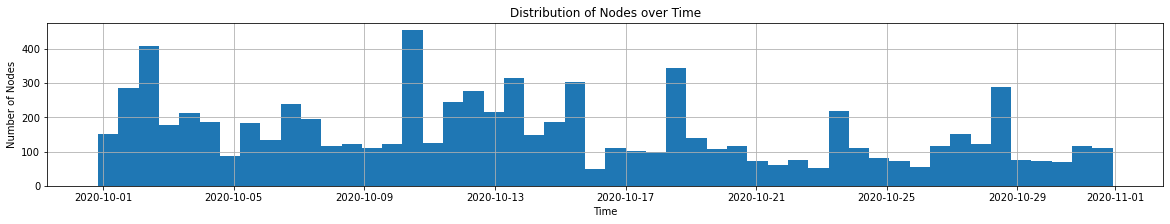

Top 10 Nodes by Statistic for Community 3


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.123940,NOS,0.207263,Mark Rutte,0.053949,NOS,0.002366,Mark Rutte,1.0,"@SjoerdMoes Nee. Ik houd afstand, blijf zoveel..."
1,0.119286,Mark Rutte,0.030841,NOS,0.050931,Maurice de Hond,0.002314,NOS,1.0,RT @mirjampauwels: De dreun van de nieuwe coro...
2,0.083069,RIVM,0.018850,RIVM,0.050463,Mark Rutte,0.001378,Maurice de Hond,1.0,@telegraaf De horeca moet van dit kabinet weg ...
3,0.080321,NU.nl,0.009147,Hugo de Jonge,0.046740,Follow the Money,0.001359,RIVM,1.0,RT @MinPres: Draag een mondkapje in publiek to...
4,0.076573,de Volkskrant,0.008815,Maurice de Hond,0.046476,Saskia Belleman,0.001254,NU.nl,1.0,"RT @MarietteSedee: Vandaag in de supermarkt, d..."
5,0.076012,RTL Nieuws,0.007735,Saskia Belleman,0.044484,RTL Nieuws,0.001205,Hugo de Jonge,1.0,RT @VrijndeSteede: Kabinet: --- Maatregelen --...
6,0.070701,Maurice de Hond,0.007034,De Telegraaf,0.043964,De Telegraaf,0.001155,RTL Nieuws,1.0,"@nijpiescc Richard, ik mag wel met 10 man in d..."
7,0.070055,Nieuwsuur,0.006818,RTL Nieuws,0.042455,Nieuwsuur,0.001142,De Telegraaf,1.0,RT @MinPres: Draag een mondkapje in publiek to...
8,0.069753,Hugo de Jonge,0.006642,Politie Nederland,0.041637,de Volkskrant,0.000988,de Volkskrant,1.0,"@ErnstSchreurs Misschien is 1,5 meter afstand ..."
9,0.068331,Follow the Money,0.006328,NU.nl,0.037725,Bas Paternotte,0.000946,Nieuwsuur,1.0,@MinPres Door al deze reagerende 'virologen' z...


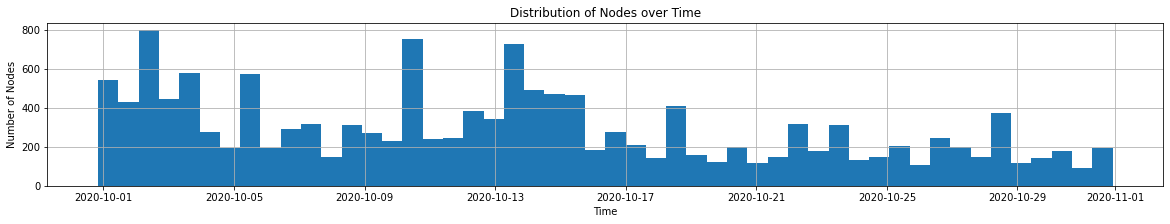

Top 10 Nodes by Statistic for Community 4


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.062083,Marc Van Ranst,0.020626,Marc Van Ranst,0.026142,ockhams-scheermes,0.001283,Marc Van Ranst,1.0,@Dsoenens Hoezo ? Ze droegen toch een mondmask...
1,0.025822,ockhams-scheermes,0.006324,Fouad Gandoul,0.021568,Lambrechts Emiel,0.000821,Fouad Gandoul,1.0,"RT @HendrikVuye: Eenvoudige regels volgen, dat..."
2,0.021750,Joël De Ceulaer,0.003798,Arbiter,0.021256,Vincent,0.000414,HLN.BE,1.0,@desmetjens En als ik vragen mag..waarom? Is h...
3,0.021502,K. Le Bato,0.002652,HLN.BE,0.020357,Marc Van Ranst,0.000318,Joël De Ceulaer,1.0,RT @LogoGezond: Hou afstand maar blijf sociaal...
4,0.021405,HLN.BE,0.001585,Jan Jambon,0.018291,misterdoom,0.000310,De Morgen,1.0,@BenWeyts Mijn vrouw die in het Buso werkt hee...
5,0.020985,N-VA,0.001113,steven vermeylen,0.016545,Maria Vanlommel,0.000278,CrisisCenter Belgium,1.0,@vanranstmarc Goede beslingen maar denk eens n...
6,0.020684,Arbiter,0.001102,CrisisCenter Belgium,0.015509,Erik De Wilde,0.000278,Sammy Mahdi,1.0,"@heindprz Op 1,5m afstand hoop ik."
7,0.020059,De Morgen,0.001101,Fabienne Kamphuis,0.014900,Armand Vervaeck🎗️,0.000270,Arbiter,1.0,RT @DorineLecluse: Ajb kan iedereen zich pls a...
8,0.019790,Vincent,0.001086,Peter Persyn🎗,0.014765,K. Le Bato,0.000269,sporza,1.0,@nigelstwits Die houden 3 meter en 3 decimeter...
9,0.019693,Armand Vervaeck🎗️,0.001076,Saïd Bataray,0.014666,Assita Kanko MEP,0.000262,Knack,1.0,@HLN_BE Mijn schouder brengt juist niks steun....


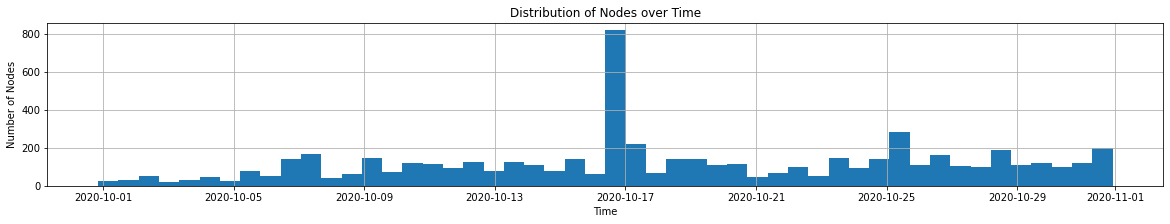

Top 10 Nodes by Statistic for Community 5


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.082627,Matthijs Pontier 💜🏴‍☠️,0.200083,Thijs,0.050608,Matthijs Pontier 💜🏴‍☠️,0.001060,Tim Hofman,1.0,ben een beetje sneu omdat ik vanavond niet op ...
1,0.059110,Tim Hofman,0.172262,Andrea,0.030148,Sander de Hosson,0.000839,Sander de Hosson,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
2,0.056729,Sander de Hosson,0.028679,Kaatje,0.027774,Tim Hofman,0.000649,Chris Klomp,1.0,"RT @AnneBruijne: “Ja, maar het beleid....”\n“N..."
3,0.055350,Chris Klomp,0.011912,Tim Hofman,0.026546,Chris Klomp,0.000614,Matthijs Pontier 💜🏴‍☠️,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
4,0.054370,Emine Ugur,0.007920,Sander de Hosson,0.025146,Hoofdzuster,0.000550,Partij voor de Dieren,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
5,0.045116,Kirsten Verdel,0.007630,Marino van Zelst 🌱,0.024459,Bert Slagter,0.000545,Bert Slagter,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
6,0.042186,Wanda de Kanter,0.006588,Emine Ugur,0.024452,Cees van Die,0.000527,Emine Ugur,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
7,0.041637,Marion Koopmans,0.005119,Marion Koopmans,0.024301,Peter Kwint,0.000523,Marion Koopmans,1.0,@markijbema het enge is dat je (ik iig) er bij...
8,0.040807,Marino van Zelst 🌱,0.004631,Chris Klomp,0.024035,Wanda de Kanter,0.000521,Jelmer Visser,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...
9,0.040118,Bert Slagter,0.003701,Jelmer Visser,0.023344,Marion Koopmans,0.000498,Marino van Zelst 🌱,1.0,RT @ashatenbroeke: Ik wil even iets zeggen nam...


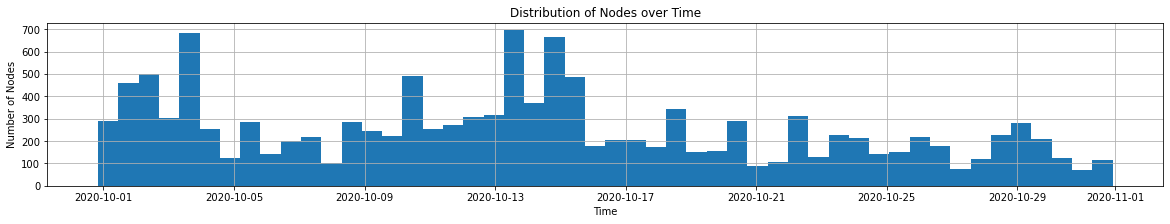

In [98]:
names = pd.Series(G_cc.vs['name'], index=range(G_cc.vcount()))

k = 6
for community in range(k):
    # Show top k nodes
    community_node_names = names.loc[louvain[community]]
    community_node_stats = NODE_STATS.loc[community_node_names]
    show_top_k_stacked_nodes(
        community_node_stats,
        LABELS,
        title=f'Nodes by Statistic for Community {community}',
    )

    # Show their timestamp distribution
    TIMESTAMPS[community_node_names].dropna().hist(bins=TIMESTAMP_BINS)
    plt.title('Distribution of Nodes over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Nodes')
    plt.show()

### Label Propagation

In [53]:
label_prop = G_cc.community_label_propagation()
print(f'Modularity after Label Propagation: {G_cc.modularity(label_prop)}')
print(f'Number of communities: {len(label_prop)}')

Modularity after Label Propagation: 0.3981217786230005
Number of communities: 690


<AxesSubplot:title={'center':'Node over community distribution'}, ylabel='None'>

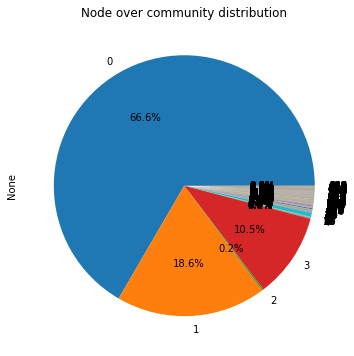

In [80]:
community_sizes = pd.Series(list(map(len, label_prop)), index=range(len(label_prop)))
community_sizes.plot.pie(y='count', autopct='%1.1f%%', title='Node over community distribution', figsize=(6,6))

Top 10 Nodes by Statistic for Community 0


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.123940,NOS,0.207263,Mark Rutte,0.056700,Wierd Duk,0.002366,Mark Rutte,1.0,RT @aartaalbers: De splinternieuwe automatisch...
1,0.119286,Mark Rutte,0.200083,Thijs,0.053949,NOS,0.002314,NOS,1.0,RT @gem_Beuningen: Kinderen en volwassenen kun...
2,0.083069,RIVM,0.172262,Andrea,0.050931,Maurice de Hond,0.001378,Maurice de Hond,1.0,RT @KarelDoorman3: Hypocriet statement van FVD...
3,0.082627,Matthijs Pontier 💜🏴‍☠️,0.030841,NOS,0.050608,Matthijs Pontier 💜🏴‍☠️,0.001359,RIVM,1.0,RT @CCAPSLOC: Vandaag in CAPSLOC! Masterclass ...
4,0.080321,NU.nl,0.028679,Kaatje,0.050463,Mark Rutte,0.001283,Marc Van Ranst,1.0,@Lerareninactie Ik heb ook klassen met zowel 1...
5,0.076573,de Volkskrant,0.020626,Marc Van Ranst,0.046740,Follow the Money,0.001254,NU.nl,1.0,@jjvpeperstraten Dat is toch de premisse van d...
6,0.076012,RTL Nieuws,0.018850,RIVM,0.046476,Saskia Belleman,0.001205,Hugo de Jonge,1.0,@GERARDBOOIJ lln kunnen elkaar niet of nauweli...
7,0.073739,Wierd Duk,0.011912,Tim Hofman,0.044484,RTL Nieuws,0.001155,RTL Nieuws,1.0,"RT @GGDGroningen: Vanaf gisteren, 30-9-20, gel..."
8,0.070701,Maurice de Hond,0.010090,Paradisebird🌴⚓️ 42 Marines The Pacific 1961-1962,0.043964,De Telegraaf,0.001142,De Telegraaf,1.0,@sydney2303r Ik mijd zelfs al die tijd de druk...
9,0.070055,Nieuwsuur,0.009147,Hugo de Jonge,0.042455,Nieuwsuur,0.001060,Tim Hofman,1.0,RT @gemwijdemeren: Dringend advies: draag een ...


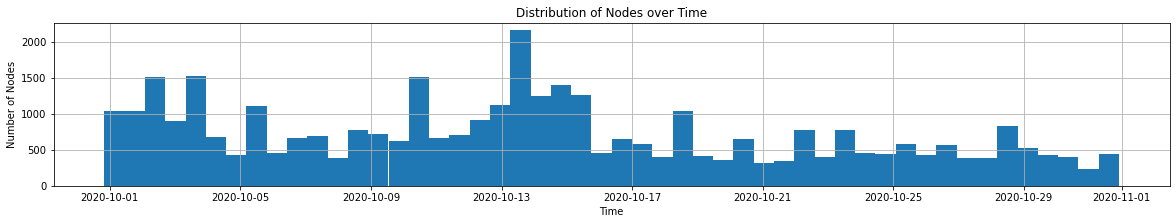

Top 10 Nodes by Statistic for Community 1


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.075280,Thierry Baudet,0.127927,Annelies,0.062079,Thierry Baudet,0.001040,Thierry Baudet,1.0,RT @mariannezw: Nee ik hou afstand van mensen ...
1,0.056341,Eelco van Hoecke,0.074110,Le Blanc,0.053103,Ebru Umar #1,0.000991,Wybren van Haga,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
2,0.055663,ZilteHond ☀️,0.006248,Wybren van Haga,0.050725,Sietske Bergsma,0.000598,Fleur Agema,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
3,0.053271,Jan Dijkgraaf,0.005101,Arthur van Amerongen,0.050386,Martin Bos,0.000595,Criticaster1960,1.0,RT @Gaia_Universe: 'Als mensen zich aan twee b...
4,0.051504,Martin Bos,0.004583,Criticaster1960,0.048908,Jan Dijkgraaf,0.000546,Annelies,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
5,0.051117,blck bx,0.004117,SmokeScream,0.048689,ZilteHond ☀️,0.000530,Marianne Zwagerman,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
6,0.051030,Ebru Umar #1,0.003609,Thierry Baudet,0.048643,Fleur Agema,0.000529,Jan Dijkgraaf,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
7,0.050298,Lou Lewinsky 2,0.003550,Mercy,0.048504,John Zuyderduyn,0.000515,Ebru Umar #1,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
8,0.049975,Wybren van Haga,0.003388,🌈Arend-Jan 🏳️‍🌈🤡🌍,0.048324,FvD lid 🚜,0.000488,Sietske Bergsma,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."
9,0.048854,John Zuyderduyn,0.002615,Marianne Zwagerman,0.048258,Roel du Pree,0.000466,blck bx,1.0,"RT @WybrenvanHaga: De 1,5 meter regel is volko..."


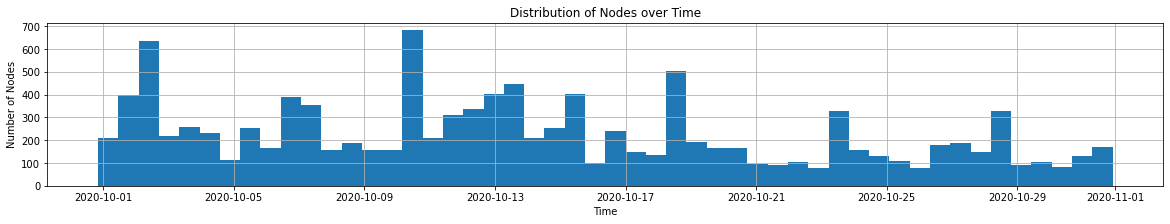

Top 10 Nodes by Statistic for Community 2


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.001023,ᴮᴱNikita⁷ maskertje op,0.000322,ᴮᴱNikita⁷ maskertje op,0.000558,ᴮᴱNikita⁷ maskertje op,0.000070,M⁷☆,1.0,"@sandaengi Ooh, en ik zie ook al goede 1.5m en..."
1,0.000980,M⁷☆,0.000174,♡𝑺𝒖𝒅𝒆 𝒁𝒂𝒏𝒂🐺⁷/ BLM ACAB FREE🇵🇸,0.000361,🖤ᴸᶦᵉˢʲᵉ,0.000054,ᴮᴱNikita⁷ maskertje op,1.0,RT @aishabear: sporten met max 30 mensen mag n...
2,0.000679,hanna,0.000172,Charlotte⁷,0.000216,Charlotte⁷,0.000040,hanna,1.0,Nora/kaz00mi
3,0.000679,☆ annieʲᵏ,0.000097,RT @httpchanie: Het is te gek voor woorden dit...,0.000194,Sterre,0.000037,Charlotte⁷,1.0,RT @debroervanroos: wacht. jongeren tot 18 jaa...
4,0.000625,Charlotte⁷,0.000093,M⁷☆,0.000153,enya🍂🃏BLM,0.000035,☆ annieʲᵏ,1.0,RT @debroervanroos: wacht. jongeren tot 18 jaa...
5,0.000614,ᴮᴱnienke⁷,0.000089,enya🍂🃏BLM,0.000151,"bIm | hello, essan⚔️🐍",0.000034,Hadia⁷,1.0,@lilchaengie ik hoor d3ze queen ecgt al voor d...
6,0.000614,Hadia⁷,0.000086,𝘪𝘭𝘰𝘯𝘢🧸♡ minho,0.000142,Lachimolala⁷,0.000032,JJK⁷ 🗃️🧮,1.0,RT @moonieminjoonie: Deze foto's zijn vandaag ...
7,0.000582,ᴮᴱ rach⁷,0.000080,hanna,0.000141,sulky⁷,0.000031,ᴮᴱnienke⁷,1.0,RT @moonieminjoonie: Deze foto's zijn vandaag ...
8,0.000539,JJK⁷ 🗃️🧮,0.000078,◡̈ sunshine ⨟ BLM,0.000118,ᴮᴱnienke⁷,0.000030,♥Brave⁷.•,1.0,RT @moonieminjoonie: Deze foto's zijn vandaag ...
9,0.000485,yrsa¹²⁽⁷⁾𖧵生 channie week!,0.000064,Lachimolala⁷,0.000107,\⁷ rereading ACOTAR| IREE DAY,0.000030,♡𝑺𝒖𝒅𝒆 𝒁𝒂𝒏𝒂🐺⁷/ BLM ACAB FREE🇵🇸,1.0,RT @moonieminjoonie: Deze foto's zijn vandaag ...


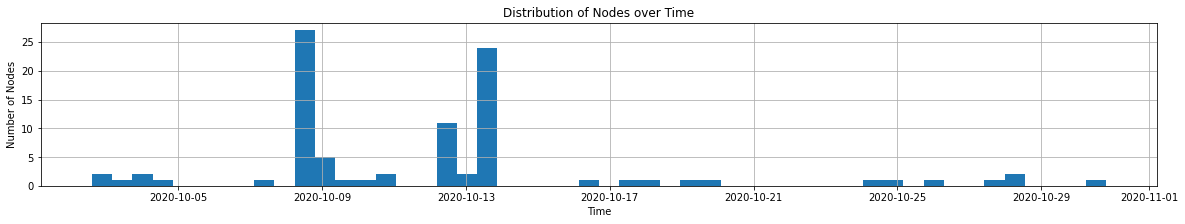

Top 10 Nodes by Statistic for Community 3


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.021750,Joël De Ceulaer,0.006324,Fouad Gandoul,0.015509,Erik De Wilde,0.000821,Fouad Gandoul,1.0,@Dsoenens Hoezo ? Ze droegen toch een mondmask...
1,0.021502,K. Le Bato,0.003798,Arbiter,0.014900,Armand Vervaeck🎗️,0.000414,HLN.BE,1.0,"RT @corinevloet: Duitse tv-journo: ""Nederland ..."
2,0.021405,HLN.BE,0.002652,HLN.BE,0.014765,K. Le Bato,0.000318,Joël De Ceulaer,1.0,RT @MarcNoppen: @HLN_BE Ik kan de minister all...
3,0.020985,N-VA,0.001585,Jan Jambon,0.014666,Assita Kanko MEP,0.000310,De Morgen,1.0,RT @MarcNoppen: @HLN_BE Ik kan de minister all...
4,0.020684,Arbiter,0.001113,steven vermeylen,0.014367,FreKo,0.000278,CrisisCenter Belgium,1.0,RT @wv012: Dagelijks zitten gasten en experten...
5,0.020059,De Morgen,0.001102,CrisisCenter Belgium,0.014335,Johnny Reweghs,0.000278,Sammy Mahdi,1.0,@FreekieDM Ja maar dat is het hem net. Heel dr...
6,0.019693,Armand Vervaeck🎗️,0.001086,Peter Persyn🎗,0.013325,avdb©,0.000270,Arbiter,1.0,@podevyns Je kan moeilijk met mondmasker op et...
7,0.019175,Knack,0.001076,Saïd Bataray,0.012976,Colditz Salad,0.000269,sporza,1.0,@KristofMaes9 @Stijn_Baert Ik vind dit verschr...
8,0.017139,Assita Kanko MEP,0.001023,Joël De Ceulaer,0.012740,Bart De Meulenaer,0.000262,Knack,1.0,@Beatever De anderhalve meter regel. \nWat ik ...
9,0.016795,Colditz Salad,0.000968,Sammy Mahdi,0.012718,Werner Niemegeers,0.000262,zin om je tom helsen,1.0,@petsandpinups Geen idee waarom hij al van op ...


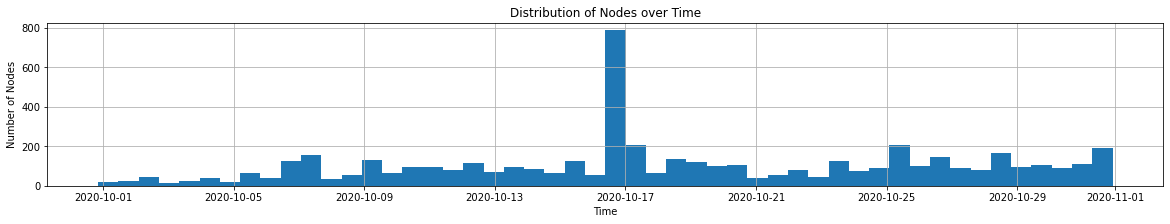

Top 10 Nodes by Statistic for Community 4


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.000032,Azazel🍂,0.000011,Azazel🍂,3.606676e-07,Azazel🍂,0.000006,Azazel🍂,0.0,Azazel🍂
1,0.000022,en als wij nog beter moeten opletten denk miss...,0.000000,en als wij nog beter moeten opletten denk miss...,4.981075e-10,en als wij nog beter moeten opletten denk miss...,0.000005,en als wij nog beter moeten opletten denk miss...,NaN,en als wij nog beter moeten opletten denk miss...


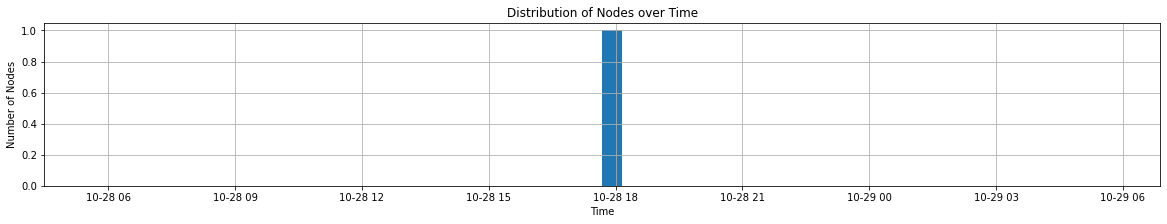

Top 10 Nodes by Statistic for Community 5


,Degree Centrality,Degree Centrality Item,Betweenness Centrality,Betweenness Centrality Item,Eigenvector Centrality,Eigenvector Centrality Item,Page Rank,Page Rank Item,Transitivity,Transitivity Item
0,0.001390,Sven Groter_3,0.000320,Sven Groter_3,0.000048,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000141,Sven Groter_3,0.000305,Sven Groter_3
1,0.000162,ARTSEN,0.000028,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000041,RT @3Groter: Arts was -terecht- (zoals zovele ...,0.000017,ARTSEN,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
2,0.000162,TISJEBOYJAY,0.000025,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000040,"RT @3Groter: De anderhalve meter blijft, ook n...",0.000017,TISJEBOYJAY,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
3,0.000108,tegen,0.000022,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000037,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000012,tegen,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
4,0.000097,Sheeple,0.000017,"RT @3Groter: De anderhalve meter blijft, ook n...",0.000033,RT @3Groter: Arts was -terecht- (zoals zovele ...,0.000011,Sheeple,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
5,0.000043,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000016,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000033,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000011,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
6,0.000043,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000013,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000032,"RT @3Groter: De anderhalve meter blijft, ook n...",0.000010,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
7,0.000043,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000011,"@3Groter Dat herken ik wel ja, aankijken met...",0.000029,"RT @3Groter: Avondklok pure nonsens, volk word...",0.000010,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
8,0.000043,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000011,https://t.co/fsmGfqEkyX\n\nMenszijn is het #TE...,0.000028,@3Groter @Dapperedodo2 Nu snap ik het pas - de...,0.000010,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."
9,0.000043,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000011,@3Groter Moet je me toch eens uitleggen hoe je...,0.000027,RT @3Groter: Arts was -terecht- (zoals zovele ...,0.000010,RT @3Groter: https://t.co/q1nz6QpSjy\n\n#TISJE...,0.000000,"RT @3Groter: Avondklok pure nonsens, volk word..."


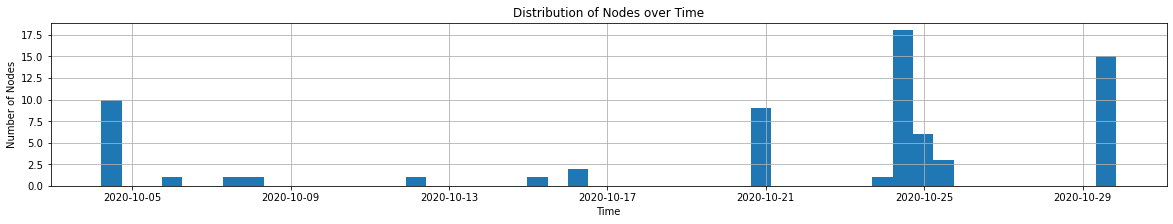

In [99]:
names = pd.Series(G_cc.vs['name'], index=range(G_cc.vcount()))

k = 6
for community in range(k):
    # Show top k nodes
    community_node_names = names.loc[label_prop[community]]
    community_node_stats = NODE_STATS.loc[community_node_names]
    show_top_k_stacked_nodes(
        community_node_stats,
        LABELS,
        title=f'Nodes by Statistic for Community {community}',
    )

    # Show their timestamp distribution
    TIMESTAMPS[community_node_names].dropna().hist(bins=TIMESTAMP_BINS)
    plt.title('Distribution of Nodes over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Nodes')
    plt.show()